In [1]:
%load_ext autoreload
%autoreload 2

# Clase Tutorial 5: Regresión Logística

## Introducción

- Hasta ahora nos estuvimos concentrando en entrenar modelos que permitieran generar una predicción numérica para una observación nueva a partir de un conjunto de variables que la caracterizaban. 

> __Ejemplo__: predecir el precio de una SUV en función de sus características. En este caso, la variable objetivo (target) es el valor numérico en dólares del precio de la SUV, y las variables explicativas son la cantidad de km recorridos, el motor, el color, la transmición, etc. 

- Para resolver esta tarea, ya vimos varios modelos de regresión y varias estrategias para validarlos y mejorarlos (por ejemplo, feature engineering y regularización). 

- ¿Qué es lo que tenían en común todos estos modelos? 
    - **La variable ojetivo siempre era numérica**.

- Sin embargo, existen algunos problemas en los que el objetivo es poder predecir el valor de una **variable categórica**.

- Esto implica que hay que redifinir (un poco) el problema.

- Objetivo (a grandes rasgos) sigue siendo el mismo: búsqueda de una función $h$ que nos permita pasar de un conjunto de valores $X$ (datos de entrada) a otro conjunto de valores $Y$ (valores objetivos).
$$ h: X \rightarrow Y$$

- Diferencia: el resultado de la predicción no puede tomar cualquier valor, sino que **está acotado a un número finito de valores posibles**. Este tipo de problemas son de <span style="color: hotpink;">**clasificación**</span>.

<div class="alert alert-block alert-info" style="background-color: #d0e8f2; border-color: #d0e8f2; color: #000;">

<b>Ejemplo:</b>  Tenemos una serie de artículos de un diario y debemos saber si los mismos pertenecen a la sección de Economía, Deportes o Sociedad. 

<img src="/home/linar/Desktop/ML/Clases/i302/Clases/05_Clase 5: Regresión Logística /images/diario.jpg" alt="image" style="display: block; margin: 0 auto; max-width: 100%; height: auto;">

- Features: Título y Texto del artículo.
- Target: Sección del diario (Economía (E), Deportes (D) o Sociedad (S))
</div>


>  🤔 ¿Porqué decimos que este es un problema de **clasificación**? 
>- Porque la variable objetivo solamente puede tomar 3 valores.
>
> 🤔 ¿Cuál es el objetivo de este modelo a entrenar?
>- Estimar la probabilidad P de que el artículo leído pertenezca a cada sección.
>- Si tenemos 100 artículos de Economía (E), 100 de Deportes (D) y 100 de Sociedad (S) y sacamos uno al azar, tendremos:
>    - $P(\text{sección=E}) = \frac{1}{3}$
>    - $P(\text{sección=D}) = \frac{1}{3}$
>    - $P(\text{sección=S}) = \frac{1}{3}$ 
>        - No es muy útil.
>
>- Pero... si después de elegir el artículo al azar, leemos el título y dice "Copa Libertadores", sabemos que las probabilidades serán muy diferentes. 
>- ¿Que cambió? Ahora tenemos más información para hacer la clasificación ya que está <b>condicionada</b>. 
>- Sería esperable que el modelo genere algo del estilo: $P(\text{sección=D}|\text{título=``Copa Libertadores"}) = 0.99$

**Generalizando**

- A partir del ejemplo anterior, podemos escribir al problema de clasificación como el cálculo de una probabilidad condicional:

$$P(y_{i}=clase_{j}|x_{i}=X) = ¿?$$

- Es decir: _¿Cuál es la probabilidad de que la observación $i$ pertenezca a la clase $j$, sabiendo el valor de sus features $x$?_

### 🤔 ¿Podemos resolver este problema con una regresión lineal?

Recordemos brevemente que la regresión lineal es un modelo que permite estimar un valor numérico a partir de una combinación lineal del valor de las features:
$$\hat{y_{i}}=w_{0}+w_{1}·x_{i1}+w_{2}·x_{i2}+\dots+w_{M}·x_{iM}$$
Donde los $w$ se estiman ($w^*$) a partir del set de entrenamiento.

- Intentemos usar esta fórmula para hacer el cálculo de probabilidad que mencionamos anteriormente. 

- Supongamos que debemos entrenar un clasificador binario que permita identificar si una obsevación pertenece a la clase "0" o a la clase "1". 
    - Es decir, intentaremos estimar $P(y=1|x)$ con la siguiente fórmula:
$$ P(y=1|x) = w_{0}+w_{1}·x_{i1}$$

In [2]:
import numpy as np

# Creamos n datos de prueba
n = 20
np.random.seed(0)
x = np.linspace(-5,5,n) + np.random.rand(n)
x = x.reshape(-1,1)
# Asignamos una clase (0 o 1)
y = np.zeros(n)
for i in range(n):
    y[i] = np.random.choice([0,1], size=1, p=[np.exp(-i/n), 1-np.exp(-i/n)])

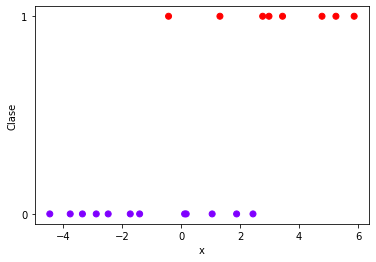

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x,y,c=y, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('Clase')
plt.yticks([0,1]);

¿Qué podemos deducir a partir de este gráfico?
- ↑ valor de x, ↑ probable que la observación pertenezca a la clase 1.
- ↓ valor de x, ↓ probable que la observación pertenezca a la clase 1.
- Rango intermedio: clase no está claramente definida.

Intentemos plasmar eso utilizando una regresión lineal:

In [4]:
from models import LinearRegression

# Instanciamos un objeto de la clase creada
linear_regression = LinearRegression(degree=1)

# Ajustamos el modelo a nuestros datos
linear_regression.fit(x, y)

In [5]:
print(linear_regression)

ŷ(x) = 0.332 + 0.116 * x^1


Generamos las predicciones para nuestros datos y graficamos:

In [6]:
predictions = linear_regression.predict(x)
print(f"Predictions: {predictions}")

Predictions: [-0.18501458 -0.1044949  -0.05638363 -0.00193186  0.0451562   0.13216954
  0.16913545  0.28311065  0.3526471   0.34638104  0.45502048  0.48564851
  0.55137919  0.65412153  0.61596578  0.67901635  0.73241837  0.88803318
  0.94288216  1.01473945]


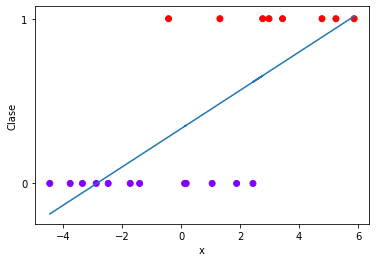

In [7]:
plt.scatter(x,y,c=y, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('Clase')
plt.yticks([0,1])
plt.plot(np.sort(x), predictions);

#### 🤔 ¿Qué opinan sobre este modelo?

⏸️ Detengámonos un momento a pensar sobre lo que acabamos de hacer:

1. Partimos de un dataset que presentaba un problema de clasificación binaria ($y$ puede valer 0 o 1 para cada observación). 
2. Visualizando los datos, vimos que aquellas observaciones con $y=1$ tenían valores de $x$ más grandes y las observaciones con $y=0$ tenían valores de $x$ más pequeños. 
3. Luego entrenamos una regresión lineal para intentar reflejar este comportamiento y eso fue lo que obtuvimos.

Pero acá hay algo raro... miren las predicciones que realizó el modelo. ¿Tienen sentido?

- Sabemos que la probabilidad debe estar acotada en el rango [0, 1], es decir que no pueden existir probabilidades negativas ni mayores que 1.
- Sabemos que la suma de todas las probabilidades para cada clase posible debe ser 1. 
    - Si hay 0.25 de probabilidad de que $y=0$, entonces $P(y=1) = 1-0.25=0.75$.

> 🤔 **¿Esto se cumple en los casos anteriores?**
>
> La respuesta es no y se debe a que la **regresión lineal** simple tiene como resultado una recta que _no está acotada_. Puede tomar cualquier valor y esto __no nos sirve para estimar una probabilidad__. Lo mismo aplica para una regresión lineal múltiple con varias features. 



#### 💭 Conclusión

La conclusión de esta pequeña prueba, es que una regresión lineal no sirve para resolver problemas de clasificación, en los que el objetivo es obtener una estimación de probabilidades condicionales a los features de cada observación.

## Regresión Logística

No todo está perdido. Hay algo que podemos hacer para subsanar los problemas que mencionamos recién.

#### Funcion sigmoide
Pensemos momentáneamente en la __función sigmoidea__:
$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

Text(0, 0.5, 'sigmoide(z)')

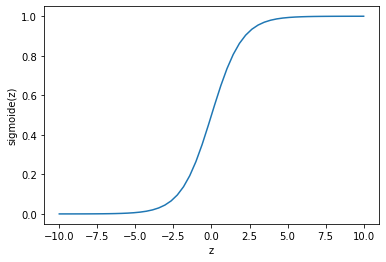

In [26]:
z = np.linspace(-10,10,50)
s = 1 / (1 + np.exp(-z))
plt.plot(z, s)
plt.xlabel('z')
plt.ylabel('sigmoide(z)')

- Vemos que esta función sigue cumpliendo con lo esperado para nuestro problema:
    - Se tienen valores más grandes para valores más grandes de z
    - Se tienen valores más chicos para valores más chicos de z
    - Se tienen valores "intermedios" para valores "intermedios" de z

- Ventaja de la función sigmoidea:
    - Está acotada en el rango (0,1). No importa cuánto valga z, $\sigma(z)$ siempre será mayor que 0 y menor que 1.

🤔 Pero... quedan algunas cosas por resolver antes de poder usar esta función para estimar probabilidades:
- La función sigmoidea recibe una variable $z$ que es única y nosotros sabemos que nuestros features $x$ pueden ser varios (es decir que $x$ es un <i>vector</i> $\bar{x}$). ¿Como lo resolvemos?
    - Ya sabemos obtener un valor numérico a partir de un conjunto de features utilizando la regresión lineal.
    $$
    z = w_{0}+w_{1}·x_{i1}+w_{2}·x_{i2}+\dots+w_{M}·x_{iM} 
    $$
    - Dicho valor no está acotado entre 0 y 1, pero la función sigmoidea sí.
    $$
    \sigma(z) = \frac{1}{1+e^{-z}} 
    $$
    - Si calculamos la función sigmoidea del valor obtenido con la regresión lineal, obtendremos un número entre 0 y 1 que podemos usar para estimar probabilidades.

    $$
    P(y_{i}=1|x=X) = \frac{1}{1+e^{-(w_{0}+w_{1}·x_{i1}+w_{2}·x_{i2}+\dots+w_{M}·x_{iM})}}
    $$

 Ésto es lo que se conoce como **regresión logística**.

### Función de costo

#### Intuición

Recordemos que la estimación de los coeficientes en la regresión lineal minimiza el error cuadrático medio (MSE).

> 🤔 **¿Los coeficientes de la regresión logística tienen el mismo objetivo?**
> 
> La respuesta es no. En el caso de los clasificadores, se utilizan otras métricas y con el siguiente ejemplo veremos por qué:
> - Al estimar el precio de una SUV obtuvimos un valor de USD 20.000, cuando su valor real era USD 21.000. El error fue de 21.000 - 20.000 = USD 1.000.
> - Al clasificar un artículo obtuvimos la categoría "economía",  cuando su etiqueta real era "sociedad". 
>    - ¿Cómo cuantificamos el error? Sólo sabemos que la predicción fue incorrecta.

En los casos de clasificación debemos pensar nuevas formas de evaluar los modelos y hacernos la pregunta: 

🤔 **¿Qué esperamos de un buen clasificador?** 

- Que nos de valores de $P(y=1|x=X)$ muy cercanos a 1 para todas las observaciones donde $y=1$ y muy cercanos a 0 para todas las observaciones donde $y=0$. Esto puede expresarse con la siguiente expresión matemática:


$$
J = \prod_{i:y_i=1}P(y=1|x=X) · \prod_{i:y_i=0}(1-P(y=1|x=X))
$$

La primer productoria hace referencia a los casos donde $y=1$ por lo que esperamos tener probabilidades cercanas a 1 y la segunda productoria hace referencia a los casos donde $y=0$ por lo que esperamos probabilidades cercanas a 0. 

A esta expresión se la conoce como <b>verosimilitud</b> o <b>likelihood</b> y es lo que trataremos de maximizar. Podemos reescribir la fórmula anterior como:
$$
J = \prod_{i=1}^{m} P(y_i=1|x_i=X)^{y_i} · (1-P(y_i=1|x_i=X))^{1-y_i}
$$
$$
log(J) = log(\prod_{i=1}^{m} P(y_i=1|x_i=X)^{y_i} · (1-P(y_i=1|x_i=X))^{1-y_i})
$$
$$
\boxed{LL = \sum_{i=1}^{m} y_i·log(P(y_i=1|x_i=X))+(1-y_i)·log((1-P(y_i=1|x_i=X)))}
$$
A esta última expresión se la conoce como <b>log-likelihood</b>, que es el logaritmo de la verosimilitud.<br>


Analicemos los posibles casos con los que nos podemos encontrar y veamos cómo quedan los términos de la sumatoria:
- <u>Caso y = 1:</u>
    - Reemplazamos $y_i = 1$ en la fórmula de LL y analizamos una sola muestra (sin la sumatoria) $$LL = 1·log(P(y_i=1|x_i=X))+(1-1)·log(1-P(y_i=1|x_i=X))$$ $$LL = log(P(y_i=1|x_i=X))$$
    - Dado que $y_i = 1$, uno esperaría que $P(y_i=1|x_i=X)$ sea muy cercano a 1. 
    - ✅ Por lo tanto, $log(P(y_i=1|x_i=X))$ sería $log(\sim1)$, que es muy cercano a 0.
    - ❌ Si el clasificador fuese malo y generara $P(y_i=1|x_i=X)$ cercanas a 0, quedaría $log(\sim0)$, que tiende a $-\infty$.

- <u>Caso y = 0:</u>
    - Reemplazamos $y_i = 0$ en la fórmula de LL y repitamos el análisis: $$LL = 0·log(P(y_i=1|x_i=X))+(1-0)·log(1-P(y_i=1|x_i=X))$$ $$LL = log(1-P(y_i=1|x_i=X))$$

    - Dado que $y_i = 0$, uno esperaría que $P(y_i=1|x_i=X)$ sea muy cercano a 0.
    - ✅ Por lo tanto, $log(1-P(y_i=1|x_i=X))$ sería $log(1-\sim0)$, que es muy cercano a 0.
    - ❌ Si el clasificador fuese malo y generara $P(y_i=1|x_i=X)$ cercanas a 1, quedaría $log(1-\sim1)$, que tiende a $-\infty$.

En resumen:
- 👍 Si el clasificador predice probabilidades cercanas al caso real, se suman valores cercanos a 0.
- 👎 Si el clasificador predice lo contrario al caso real, se suman valores muy grandes con signo negativo.

Veamos esta intuición graficamente:



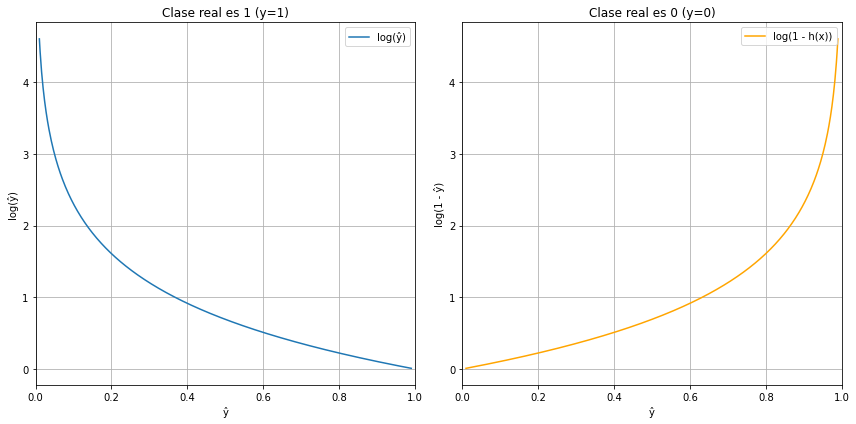

In [27]:
x_plot = np.linspace(0.01, 0.99, 500) 

cost_h = -np.log(x_plot)
cost_1_minus_h = -np.log(1 - x_plot)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_plot, cost_h, label='log(ŷ)')
plt.title('Clase real es 1 (y=1)')
plt.xlabel('ŷ')
plt.ylabel('log(ŷ)')
plt.xlim(0, 1)
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_plot, cost_1_minus_h, label='log(1 - h(x))', color='orange')
plt.title('Clase real es 0 (y=0)')
plt.xlabel('ŷ')
plt.ylabel('log(1 - ŷ)')
plt.xlim(0, 1) 
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Estimación de los coeficientes
- Recordemos que el objetivo de la regresión logística es poder estimar
$$
P(y_{i}=1|x=X) = \frac{1}{1+e^{-(w_{0}+w_{1}·x_{i1}+w_{2}·x_{i2}+\dots+w_{M}·x_{iM})}}
$$
- Esto implica que, al igual que en la regresión lineal, _debemos encontrar los valores de los $w$ que ajusten mejor a los datos._

- En lugar de maximizar la log-likelihood, solemos minimizar el **negative log-likelihood (NLL)**, ya que la minimización es más conveniente para los algoritmos de optimización. El **NLL** se define como:

$$
NLL = -LL = -\sum_{i=1}^{N} \left( y_i \cdot \log(P(y_i=1|x_i=X)) + (1-y_i) \cdot \log(1-P(y_i=1|x_i=X)) \right)
$$

El NLL también se conoce como log loss o **Binary Cross Entropy** (BCE):

$$
BCE = -\sum_{i=1}^{N} \left( y_i \cdot \log(\hat{y_i}) + (1-y_i) \cdot \log(1-\hat{y_i}) \right)
$$

- Este es el valor que tratamos de **minimizar** para ajustar los coeficientes del modelo en la regresión logística.

- Los coeficientes $w$ se encuentran utilizando __algoritmos de optimización numérica__, ya que la naturaleza no lineal de la función sigmoide impide obtener una solución analítica directa. Los optimizadores como el Gradiente Descendente son los más utilizados para este tipo de problemas.

#### ¿Qué es el gradiente descendente?

- Es un algoritmo iterativo que ajusta los coeficientes del modelo para minimizar una función de costo. 

- En cada iteración, el algoritmo calcula la derivada parcial de la función de costo con respecto a cada coeficiente $w$, y ajusta los valores de $w$ en la dirección opuesta al gradiente, ya que el gradiente apunta hacia el máximo de la función, y nosotros queremos minimizarla.

<div style="text-align: center;">
<img src="/home/linar/Desktop/ML/Clases/i302/Clases/05_Clase 5: Regresión Logística /images/gradient_descent.gif" alt="image" width="400"/> </div>

- En el caso de la regresión logística, la función de costo que minimizamos es el NLL. El gradiente de la función de costo respecto a los coeficientes $w$ es:

$$
\frac{\partial NLL}{\partial w_j} = \frac{1}{N} \sum_{i=1}^{N} \left( \hat{y}_i - y_i \right) \cdot x_{ij}
$$

Donde:
- $\hat{y}_i = P(y_i=1|x_i) $ es la probabilidad predicha de la clase 1 para la entrada $ i $.
- $ y_i $ es la verdadera etiqueta (0 o 1) para la entrada $ i $.
- $ x_{ij} $ es la $j$-ésima característica de la entrada $ i $.

**Proceso**
1. **Inicialización de coeficientes:** Al principio, se suelen inicializar todos los coeficientes $w$ en 0 (o valores pequeños aleatorios).
   
2. **Calcular las predicciones:** En cada iteración, se calculan las probabilidades predichas usando la fórmula de la regresión logística:
   
   $$
   \hat{y}_i = \frac{1}{1 + e^{-(w_0 + w_1 x_{i1} + \dots + w_n x_{iM})}}
   $$

3. **Actualizar los coeficientes:** Se calcula el gradiente de la función de costo respecto a cada $w_j$ y se actualizan los coeficientes usando la siguiente regla:
   
   $$
   w_j := w_j - \alpha \cdot \frac{\partial NLL}{\partial w_j}
   $$

   Donde $\alpha$ es la **tasa de aprendizaje**, que controla el tamaño del paso en cada iteración.

4. **Repetir:** Este proceso se repite hasta que los coeficientes convergen a valores que minimizan la función de costo, o hasta que se alcanza un número máximo de iteraciones.

### Umbral de decisión

- Una vez que ajustamos los coeficientes $w$ y obtenemos la probabilidad $P(y=1|x=X)$, necesitamos tomar una decisión: ¿en qué punto determinamos que una observación pertenece a la clase 1 o a la clase 0?

- Dado que la regresión logística devuelve probabilidades entre 0 y 1, debemos elegir un **umbral** o **threshold**. 

- El valor más común es 0.5, lo que significa que si $P(y=1|x=X) \geq 0.5$, clasificamos la observación como $y=1$, y si $P(y=1|x=X) < 0.5$, clasificamos como $y=0$.

- La elección del umbral tiene un impacto importante en el rendimiento del modelo. 
    - Si elegimos un umbral más alto (por ejemplo, 0.7), seremos más estrictos al clasificar una observación como $y=1$, lo que puede reducir los **falsos positivos** pero aumentar los **falsos negativos**. 
    - Si el umbral es más bajo (por ejemplo, 0.3), el modelo será más permisivo, lo que puede aumentar los **falsos positivos** pero reducir los **falsos negativos**.

- El umbral ideal puede variar según el problema específico y los costos asociados a los distintos tipos de errores (falsos positivos y falsos negativos). Por ejemplo, en un diagnóstico médico, podríamos querer un umbral bajo para minimizar los falsos negativos y asegurarnos de detectar todos los casos positivos.


## 💻 Implementación en Python

Probamos con el mismo dataset con el que hicimos la regresión lineal:

In [10]:
from models import LogisticRegression

# Instanciamos un objeto de esa clase
logistic_regression = LogisticRegression()

# Ajustamos esta instancia con los datos de entrenamiento
logistic_regression.fit(x, y)

Una vez que tenemos el modelo entrenado, podemos utilizarlo para hacer predicciones:

In [11]:
logistic_regression.predict(x)

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

- Observamos que las predicciones obtenidas son __las clases de pertenencia de cada observación__ según el modelo. 

- Pero si estábamos hablando de estimar probabilidades, ¿por qué el modelo genera etiquetas y no estima probabilidades? 
    - La realidad es que el modelo hace ambas cosas:
    1. Estima las probabilidades de pertenecer a cada clase: método `.predict_proba()`
    2. Compara esas probabilidades con un umbral: método `.predict()`

In [12]:
logistic_regression.predict_proba(x)

array([[0.98399301, 0.01600699],
       [0.97362869, 0.02637131],
       [0.96456985, 0.03543015],
       [0.95070296, 0.04929704],
       [0.93469686, 0.06530314],
       [0.89189304, 0.10810696],
       [0.86716964, 0.13283036],
       [0.76032931, 0.23967069],
       [0.67132635, 0.32867365],
       [0.68002049, 0.31997951],
       [0.51648783, 0.48351217],
       [0.46805421, 0.53194579],
       [0.36722143, 0.63277857],
       [0.23241823, 0.76758177],
       [0.27825994, 0.72174006],
       [0.20548852, 0.79451148],
       [0.15571379, 0.84428621],
       [0.06441626, 0.93558374],
       [0.04639309, 0.95360691],
       [0.02994205, 0.97005795]])

Vemos que el output de `.predict_proba(x)` es un `ndarray` de forma (`n_obsevaciones`, `n_clases`). Como en este ejemplo tenemos 20 observaciones y 2 clases posibles (0 o 1), tenemos:

In [13]:
logistic_regression.predict_proba(x).shape

(20, 2)

Donde la columna 0 es la probabilidad de pertenencia a la clase 0 y la columna 1 es la probabilidad de pertenencia a la clase 1.

**🤔 ¿Cuánto debe valer la suma de cada fila?** 

Verifiquemos:

In [14]:
logistic_regression.predict_proba(x).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

Si nos quedamos sólamente con la columna 1, podremos hacer la comparación que mencionamos recién:

In [15]:
# Nos quedamos sólamente con la columna 1
prob_1 = logistic_regression.predict_proba(x)[:,1]
# Comparamos con 0.5
prob_1 >= 0.5

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Una vez que ya tenemos las etiquetas puestas por el modelo ($\hat{y}$) debemos comparar esas predicciones con los valores reales ($y$).

In [16]:
y_pred = logistic_regression.predict(x)
comparison = np.array_equal(y, y_pred)

print(f"¿y e y_pred son iguales? {comparison}")

¿y e y_pred son iguales? False


Entonces no todos los puntos fueron clasificados correctamente. Para medir que tan bien esta funcionando el clasificador, podemos usar métricas de performance:

$$\text{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}$$

La **Accuracy** mide la proporción de predicciones correctas sobre el total de predicciones.


In [17]:
def accuracy_score(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    
    y_pred_classes = np.argmax(y_pred, axis=1)
    correct_predictions = np.sum(y_true == y_pred_classes)
    return round(correct_predictions / len(y_true),3)

print(f"Accuracy = {accuracy_score(y,y_pred)}")

Accuracy = 0.85


$$ \text{Precision} = \frac{TP}{TP + FP}$$

La **Precision** mide la proporción de verdaderos positivos sobre el total de predicciones positivas.


In [18]:
def precision_score(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    tp = np.sum((y_true == 1) & (y_pred_classes == 1))
    fp = np.sum((y_true == 0) & (y_pred_classes == 1))
    return round(tp / (tp + fp),3) if (tp + fp) > 0 else 0

print(f"Precision = {precision_score(y,y_pred)}")

Precision = 0.778


$$\text{Recall} = \frac{TP}{TP + FN}$$

El **Recall** mide la proporción de verdaderos positivos sobre el total de casos realmente positivos.


In [19]:
def recall_score(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    tp = np.sum((y_true == 1) & (y_pred_classes == 1))
    fn = np.sum((y_true == 1) & (y_pred_classes == 0))
    return round(tp / (tp + fn),3) if (tp + fn) > 0 else 0

print(f"Recall = {recall_score(y,y_pred)}")

Recall = 0.875


$$\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

El **F1 Score** es la media armónica de la precisión y el recall, y proporciona una medida única que combina ambos.


In [20]:
def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return round(2 * (precision * recall) / (precision + recall),2) if (precision + recall) > 0 else 0

print(f"F1 = {f1_score(y,y_pred)}")

F1 = 0.82


**Matriz de confusión**

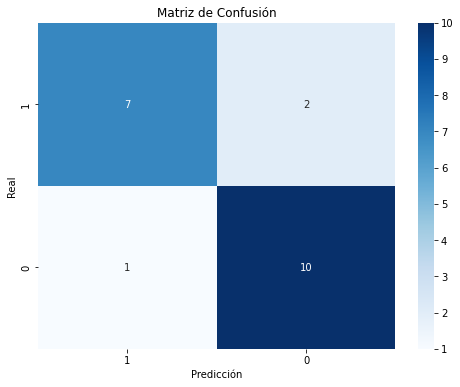

In [21]:
import seaborn as sns

def confusion_matrix(y_true, y_pred):
    """
    Calcula la matriz de confusión.
    y_true: Vector de etiquetas verdaderas
    y_pred: Matriz de probabilidades predichas
    """
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    tp = np.sum((y_true == 1) & (y_pred_classes == 1))
    fp = np.sum((y_true == 0) & (y_pred_classes == 1))
    fn = np.sum((y_true == 1) & (y_pred_classes == 0))
    tn = np.sum((y_true == 0) & (y_pred_classes == 0))
    return np.array([[tp, fp], [fn, tn]])

def plot_confusion_matrix(conf_matrix, class_names):
    """
    Plotea la matriz de confusión utilizando seaborn y matplotlib.
    conf_matrix: Matriz de confusión
    class_names: Lista con los nombres de las clases
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title('Matriz de Confusión')
    plt.show()

plot_confusion_matrix(confusion_matrix(y, y_pred), ["1", "0"])

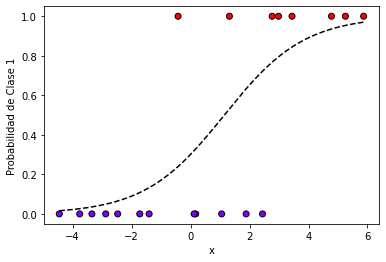

In [28]:
x_range = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
probs = logistic_regression.predict_proba(x_range)

plt.scatter(x, y, c=y, cmap='rainbow', edgecolor='k')
plt.plot(x_range, probs[:, 1], 'k--')

plt.xlabel('x')
plt.ylabel('Probabilidad de Clase 1')
plt.show()